In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import torchvision.utils as vutils
# Define transformations


In [2]:

transform = transforms.Compose([
    transforms.ToTensor()

])

# Download and load the EMNIST dataset
train_dataset = datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)




100%|██████████| 561753746/561753746 [00:12<00:00, 43669499.00it/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


In [3]:
train_dataset.classes

['N/A',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [4]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2000, shuffle=False)



In [5]:
image,label=next(iter(train_loader))

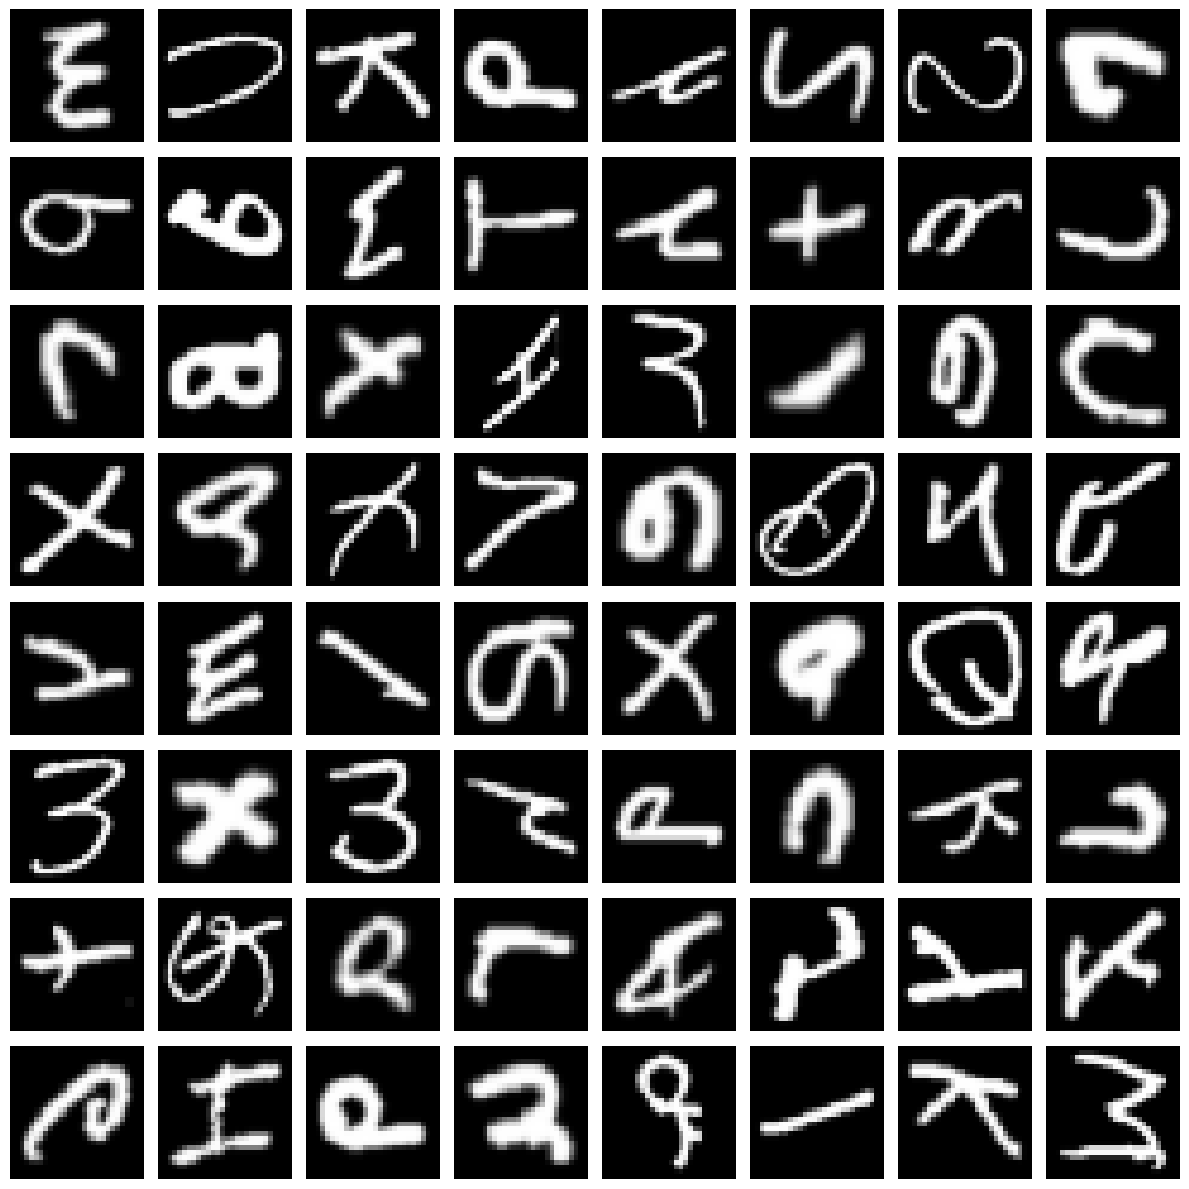

In [7]:


# Assuming img is a batch of images with shape [64, C, H, W]
# where C is the number of color channels, and H, W are height and width of the images

# Retrieve one batch
img, label = next(iter(train_loader))

# Create a grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

# Flatten the array of axes
axes = axes.flatten()

for i in range(64):
    # Select the i-th image in the batch
    image = img[i]

    # If the image has more than one channel, rearrange the dimensions
    # (PyTorch uses CxHxW and matplotlib expects HxWxC)
    if image.shape[0] > 1:
        image = image.permute(1, 2, 0)

    # Display the image
    axes[i].imshow(image.squeeze(), cmap='gray' if image.shape[0] == 1 else None)
    axes[i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()


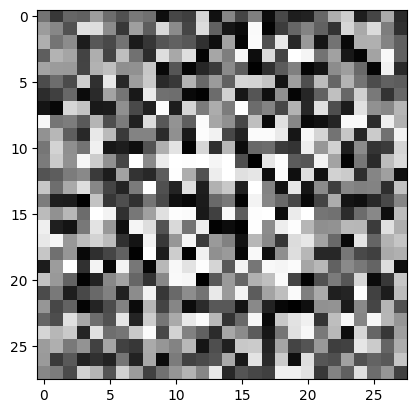

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64, kernel_size=3):
        super(Generator, self).__init__()
        self.hidden0 = nn.Sequential(
            nn.ConvTranspose2d(z_dim, hidden_dim, kernel_size=kernel_size, stride=2),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU())
            # Additional layers can be added here for a more complex model
        self.hidden1= nn.Sequential(nn.ConvTranspose2d(hidden_dim, hidden_dim*2, kernel_size=kernel_size, stride=2),
            nn.BatchNorm2d(hidden_dim*2),
            nn.ReLU())

        self.hidden2= nn.Sequential(nn.ConvTranspose2d(hidden_dim*2, hidden_dim*4, kernel_size=3, stride=2),
            nn.BatchNorm2d(hidden_dim*4),
            nn.ReLU())

        self.final= nn.Sequential(nn.ConvTranspose2d(hidden_dim*4, im_chan, kernel_size=2, stride=2,padding=1),
            nn.BatchNorm2d(im_chan),
            nn.Tanh())



    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.final(x)
        return x


# Parameters
z_dim = 64
im_chan = 1  # For RGB images
noise = torch.randn(1,z_dim, 1, 1)


gen = Generator(z_dim=z_dim, im_chan=im_chan, kernel_size=3)
generated_image = gen(noise)

img=generated_image.squeeze().detach().numpy()
plt.imshow(img, cmap='gray')


In [ ]:
class Discriminator(nn.Module):
    def __init__ (self,im_chan=1,hidden_dim=8,kernel_size=3,stride=1):
        super(Discriminator,self).__init__()
        self.hidden0=nn.Sequential(
            nn.Conv2d(im_chan, hidden_dim,kernel_size=kernel_size,stride=stride),
            nn.BatchNorm2d(hidden_dim),
            nn.ELU())
        self.hidden1=nn.Sequential(
            nn.Conv2d(hidden_dim, hidden_dim*2,kernel_size=kernel_size,stride=stride),
            nn.BatchNorm2d(hidden_dim*2),
            nn.ELU())

        self.hidden2=nn.Sequential(
            nn.Conv2d(hidden_dim*2, hidden_dim,kernel_size=kernel_size,stride=stride),
            nn.BatchNorm2d(hidden_dim),
            nn.ELU())

        self.hidden3=nn.Sequential(
            nn.Flatten(),
            nn.Linear(3872,200)

        )
        self.final=nn.Sequential(

            nn.Linear(200,1),
            nn.Sigmoid()

        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.final(x)
        return x

disc=Discriminator()
#disc(image)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def display_images(imgs):
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
    count = 0
    for y in range(4):
        for x in range(4):
            img = imgs[count].view(28, 28)
            axs[y][x].imshow(img, cmap="gray")
            count += 1
    plt.show()

fixed_noise = torch.randn(6, z_dim, 1, 1, device=device)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
lr=3e-4
z_dim=10
num_epoches=50
fixed_noise = torch.randn(6, z_dim, 1, 1, device=device)

disc=Discriminator().to(device)
gen=Generator(z_dim=z_dim).to(device)

optim_disc=optim.Adam(disc.parameters(),lr=lr)
optim_gen=optim.Adam(gen.parameters(),lr=lr)
criterion=nn.BCELoss()

Epoch [1/50] - Discriminator Loss: 0.1211, Generator Loss: 9.0490


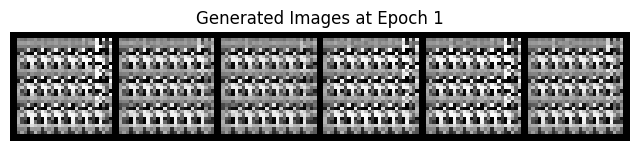

Epoch [2/50] - Discriminator Loss: 0.0479, Generator Loss: 10.9840


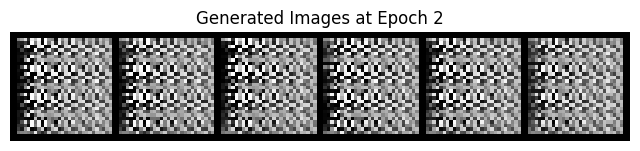

Epoch [3/50] - Discriminator Loss: 0.0469, Generator Loss: 10.4856


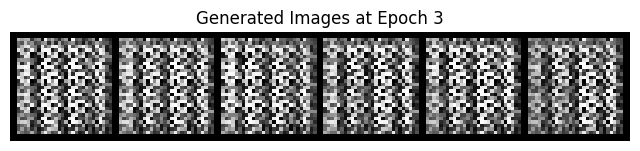

Epoch [4/50] - Discriminator Loss: 0.0285, Generator Loss: 9.0810


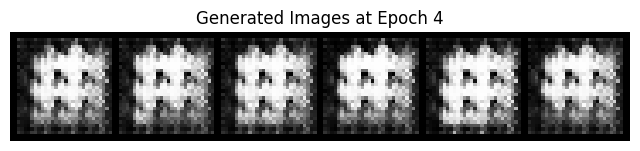

Epoch [5/50] - Discriminator Loss: 0.0891, Generator Loss: 9.2710


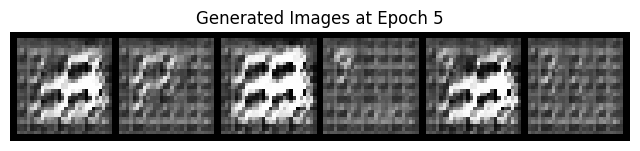

Epoch [6/50] - Discriminator Loss: 0.0436, Generator Loss: 7.7001


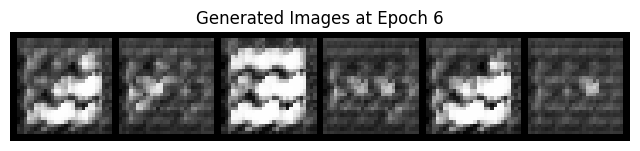

Epoch [7/50] - Discriminator Loss: 0.0692, Generator Loss: 7.2359


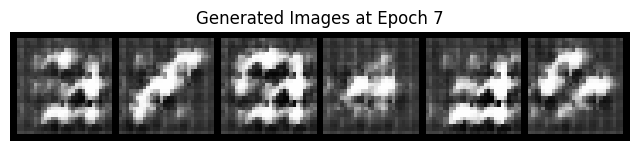

Epoch [8/50] - Discriminator Loss: 0.0601, Generator Loss: 6.2637


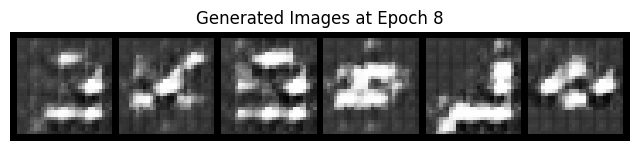

Epoch [9/50] - Discriminator Loss: 0.0664, Generator Loss: 6.7362


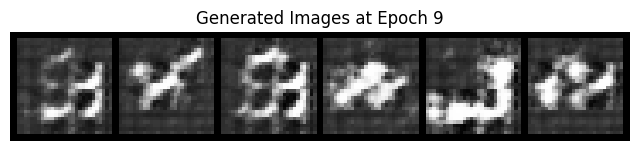

Epoch [10/50] - Discriminator Loss: 0.0539, Generator Loss: 6.5307


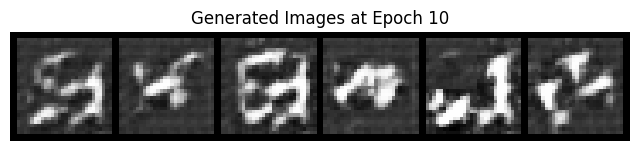

Epoch [11/50] - Discriminator Loss: 0.0920, Generator Loss: 5.9211


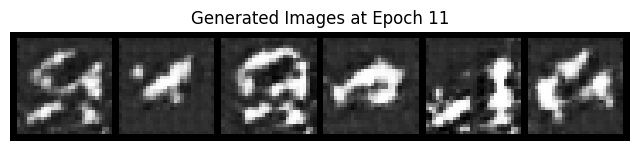

Epoch [12/50] - Discriminator Loss: 0.1445, Generator Loss: 5.5223


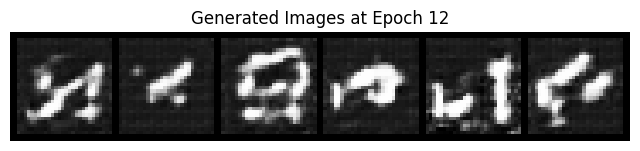

Epoch [13/50] - Discriminator Loss: 0.1906, Generator Loss: 4.4731


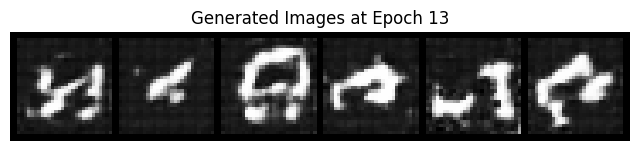

Epoch [14/50] - Discriminator Loss: 0.2197, Generator Loss: 3.9917


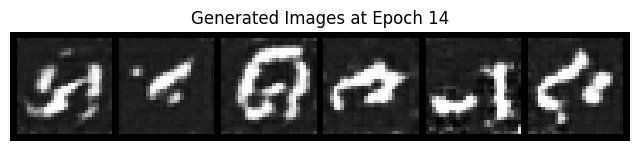

Epoch [15/50] - Discriminator Loss: 0.2803, Generator Loss: 3.3850


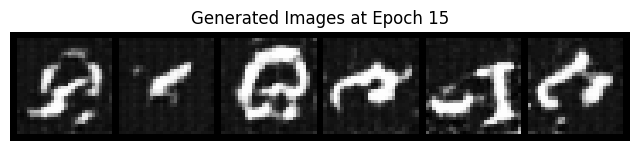

Epoch [16/50] - Discriminator Loss: 0.3278, Generator Loss: 2.7971


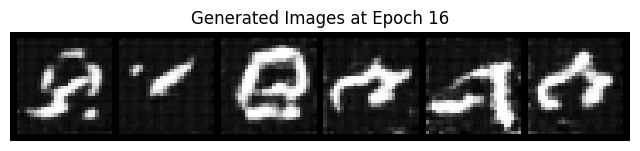

Epoch [17/50] - Discriminator Loss: 0.3427, Generator Loss: 2.6939


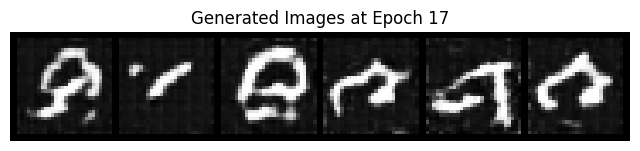

Epoch [18/50] - Discriminator Loss: 0.3897, Generator Loss: 2.2615


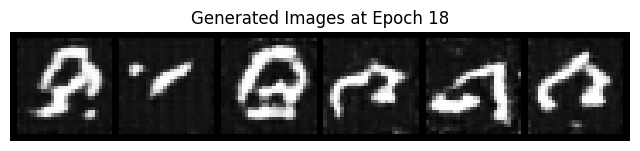

Epoch [19/50] - Discriminator Loss: 0.4182, Generator Loss: 2.1137


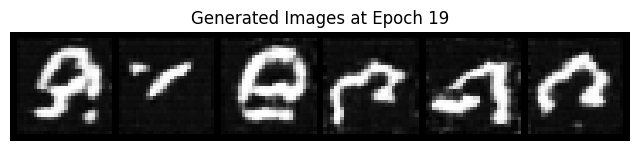

Epoch [20/50] - Discriminator Loss: 0.4190, Generator Loss: 2.2538


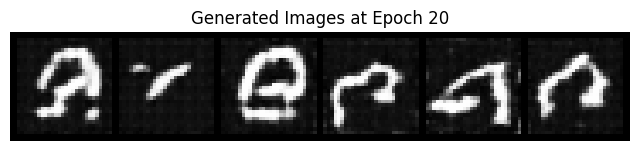

Epoch [21/50] - Discriminator Loss: 0.4594, Generator Loss: 1.8769


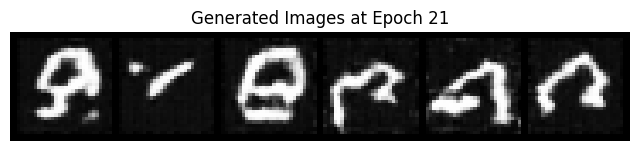

Epoch [22/50] - Discriminator Loss: 0.4642, Generator Loss: 1.9248


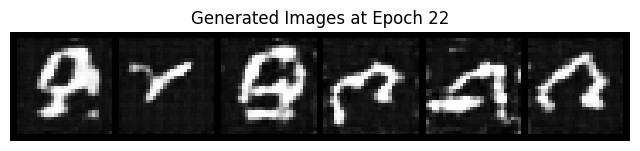

Epoch [23/50] - Discriminator Loss: 0.4732, Generator Loss: 1.9649


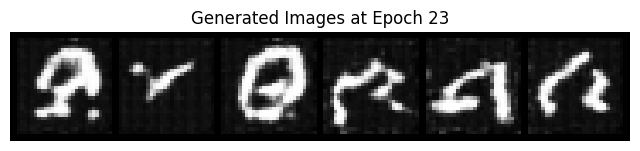

Epoch [24/50] - Discriminator Loss: 0.4618, Generator Loss: 2.2057


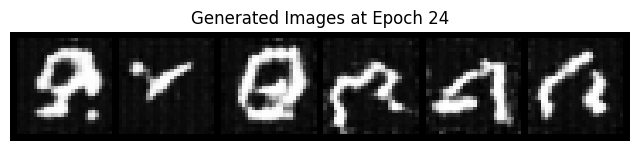

Epoch [25/50] - Discriminator Loss: 0.4858, Generator Loss: 1.7762


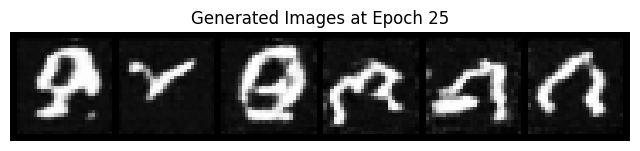

Epoch [26/50] - Discriminator Loss: 0.5107, Generator Loss: 1.6379


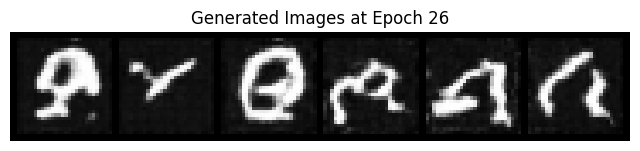

Epoch [27/50] - Discriminator Loss: 0.5160, Generator Loss: 1.5307


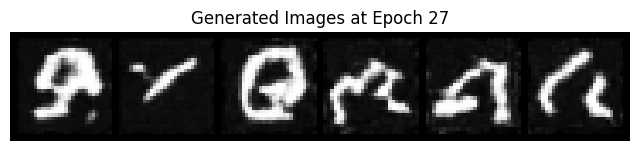

Epoch [28/50] - Discriminator Loss: 0.5107, Generator Loss: 1.6394


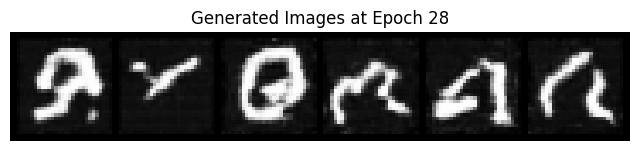

Epoch [29/50] - Discriminator Loss: 0.4916, Generator Loss: 1.7010


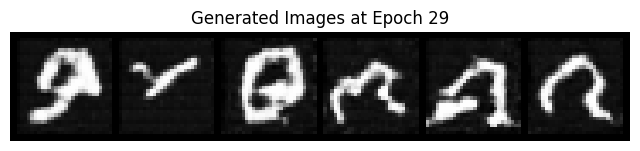

Epoch [30/50] - Discriminator Loss: 0.5075, Generator Loss: 1.6903


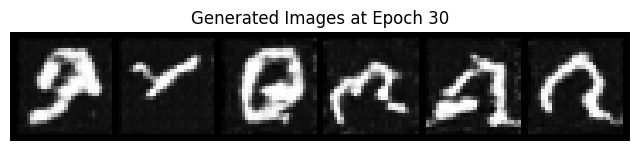

Epoch [31/50] - Discriminator Loss: 0.5378, Generator Loss: 1.6188


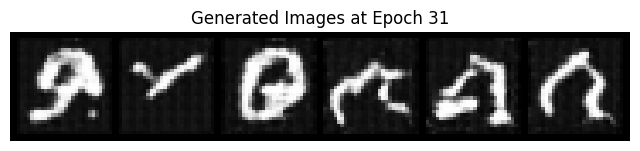

Epoch [32/50] - Discriminator Loss: 0.5209, Generator Loss: 1.6459


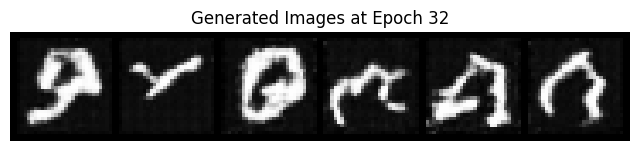

Epoch [33/50] - Discriminator Loss: 0.5455, Generator Loss: 1.5670


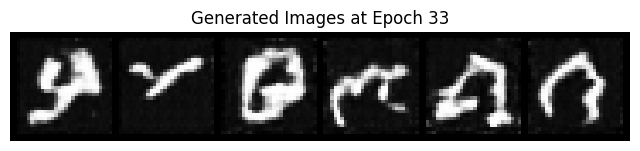

Epoch [34/50] - Discriminator Loss: 0.5706, Generator Loss: 1.3991


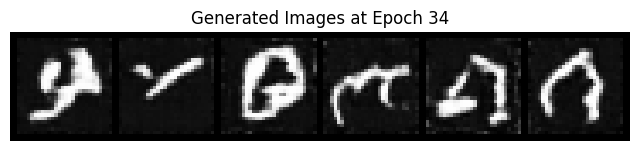

Epoch [35/50] - Discriminator Loss: 0.5650, Generator Loss: 1.2915


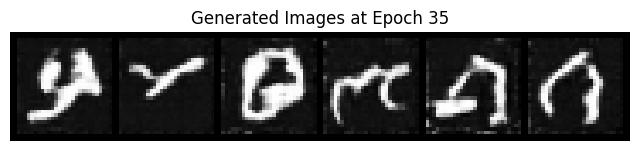

Epoch [36/50] - Discriminator Loss: 0.5624, Generator Loss: 1.3457


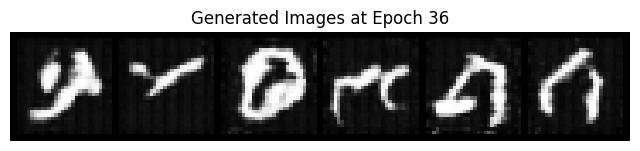

Epoch [37/50] - Discriminator Loss: 0.5541, Generator Loss: 1.4875


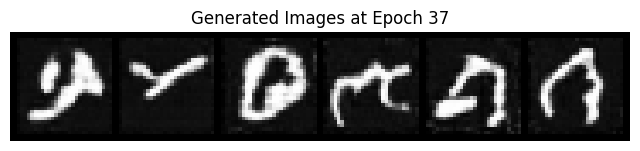

Epoch [38/50] - Discriminator Loss: 0.5755, Generator Loss: 1.3941


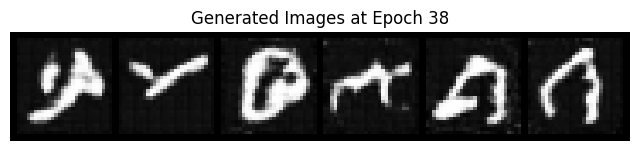

Epoch [39/50] - Discriminator Loss: 0.5791, Generator Loss: 1.2837


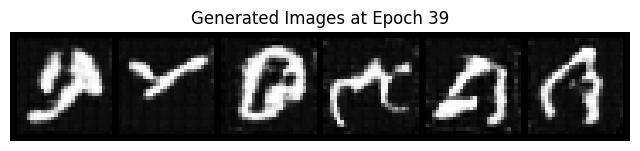

Epoch [40/50] - Discriminator Loss: 0.5877, Generator Loss: 1.2719


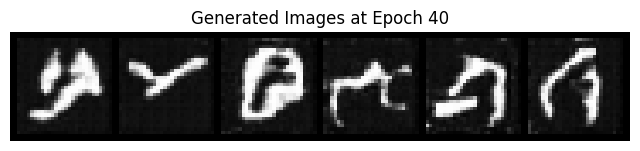

Epoch [41/50] - Discriminator Loss: 0.5722, Generator Loss: 1.5176


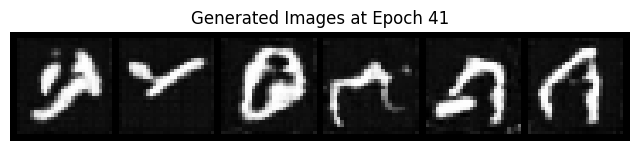

Epoch [42/50] - Discriminator Loss: 0.5841, Generator Loss: 1.2678


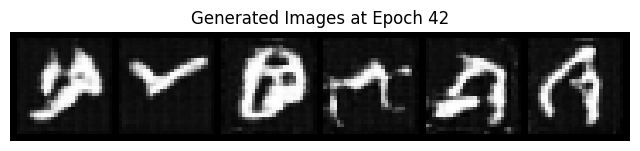

Epoch [43/50] - Discriminator Loss: 0.5908, Generator Loss: 1.1984


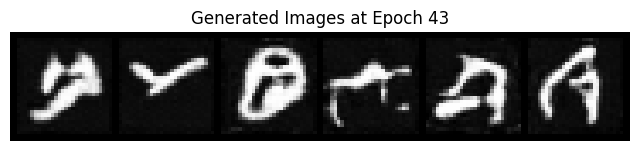

Epoch [44/50] - Discriminator Loss: 0.6135, Generator Loss: 1.1427


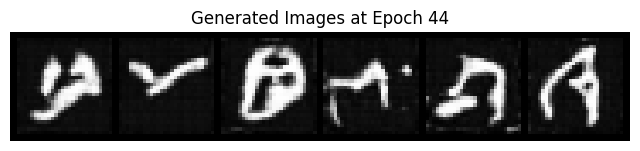

Epoch [45/50] - Discriminator Loss: 0.6019, Generator Loss: 1.1678


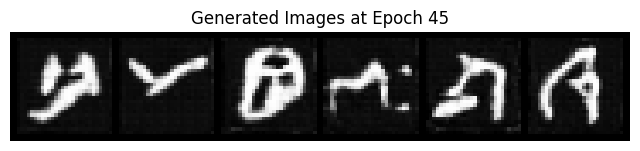

Epoch [46/50] - Discriminator Loss: 0.6006, Generator Loss: 1.1939


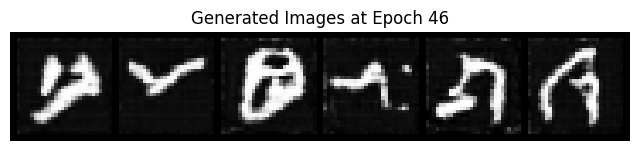

Epoch [47/50] - Discriminator Loss: 0.5885, Generator Loss: 1.3124


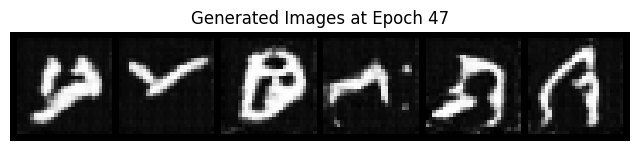

Epoch [48/50] - Discriminator Loss: 0.5849, Generator Loss: 1.2635


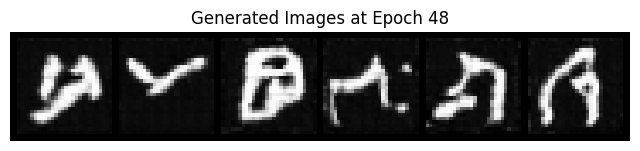

Epoch [49/50] - Discriminator Loss: 0.6061, Generator Loss: 1.1481


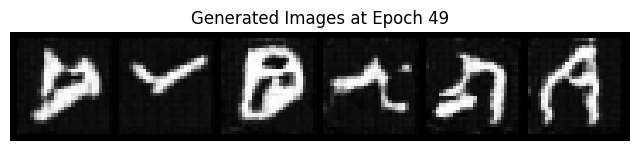

Epoch [50/50] - Discriminator Loss: 0.5684, Generator Loss: 1.3818


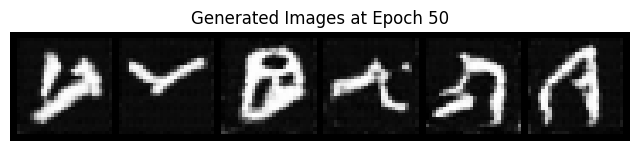

In [ ]:
for epoch in range(num_epoches):
    total_loss_d = 0.0  # Total loss for discriminator
    total_loss_g = 0.0  # Total loss for generator
    num_batches = 0

    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)
        num_batches += 1
        # Training discriminator on real data
        optim_disc.zero_grad()
        Real_Labels = torch.ones(batch_size, device=real_images.device)
        Real_output = disc(real_images).view(-1)
        Real_Loss = criterion(Real_output, Real_Labels)

        # Training discriminator on fake data
        Fake_Labels = torch.zeros(batch_size, device=real_images.device)
        noise = torch.randn(batch_size, z_dim, 1, 1, device=real_images.device)
        fake_images = gen(noise)
        Fake_output = disc(fake_images.detach()).view(-1)  # Detach to avoid backprop through generator
        Fake_Loss = criterion(Fake_output, Fake_Labels)

        # Total Loss of Discriminator and update
        LossD = (Fake_Loss + Real_Loss) / 2
        LossD.backward()
        optim_disc.step()

        total_loss_d += LossD.item()

        # Training generator
        optim_gen.zero_grad()
        # No need to generate fake images again, use the previously generated ones
        output = disc(fake_images).view(-1)
        LossG = criterion(output, Real_Labels)
        LossG.backward()  # No need for retain_graph=True here
        optim_gen.step()

        total_loss_g += LossG.item()

        torch.save(gen.state_dict(), "generator_latest.pth")
        torch.save(disc.state_dict(), "discriminator_latest.pth")




    avg_loss_d = total_loss_d / num_batches
    avg_loss_g = total_loss_g / num_batches
    print(f"Epoch [{epoch+1}/{num_epoches}] - Discriminator Loss: {avg_loss_d:.4f}, Generator Loss: {avg_loss_g:.4f}")
    with torch.no_grad():
      fake_images = gen(fixed_noise).detach().cpu()
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title(f"Generated Images at Epoch {epoch+1}")
    plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True), (1,2,0)))
    plt.show()


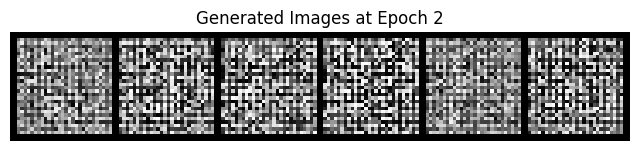

In [ ]:
import numpy as np
import torchvision.utils as vutils
with torch.no_grad():
      fake_images = gen(fixed_noise).detach().cpu()
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title(f"Generated Images at Epoch {1+1}")
plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True), (1,2,0)))
plt.show()

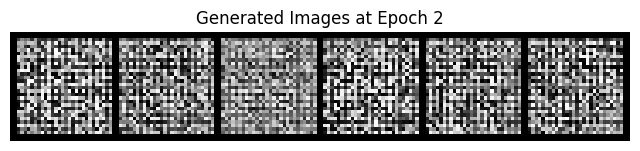

In [ ]:
fixed_noise = torch.randn(6, z_dim, 1, 1, device=device)
import numpy as np
import torchvision.utils as vutils
with torch.no_grad():
      fake_images = gen(fixed_noise).detach().cpu()
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title(f"Generated Images at Epoch {1+1}")
plt.imshow(np.transpose(vutils.make_grid(fake_images, padding=2, normalize=True), (1,2,0)))
plt.show()